In [62]:
import requests
import zipfile
from pathlib import Path

import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1
0.15.2


## Dataset

In [63]:
data_path = Path("data/")
image_path = data_path / "images"


check = False

if check:
    if image_path.is_dir():
        print("Directory exists.")
    else:
        print("{image_path} path does not exist. Creating...")
        image_path.mkdir(parents=True, exist_ok=True)

    with open(image_path / "images.zip", "wb") as f:
        print("Downloading images...")
        requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Images downloaded, writing to file...")
        f.write(requests.content)

In [64]:
## unzip the images
if check:
    print("Unzipping images...")
    with zipfile.ZipFile(image_path / "images.zip", "r") as zip_ref:
        zip_ref.extractall(image_path)
        print("Images unzipped.")

## Data Preparation and Data Exploration

In [65]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 1 images in 'data/images'.
There are 3 directories and 0 images in 'data/images/test'.
There are 0 directories and 19 images in 'data/images/test/steak'.
There are 0 directories and 31 images in 'data/images/test/sushi'.
There are 0 directories and 25 images in 'data/images/test/pizza'.
There are 3 directories and 0 images in 'data/images/train'.
There are 0 directories and 75 images in 'data/images/train/steak'.
There are 0 directories and 72 images in 'data/images/train/sushi'.
There are 0 directories and 78 images in 'data/images/train/pizza'.


In [66]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [67]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.name
print(image_class)

data/images/test/pizza/2236338.jpg
pizza


Image path: data/images/test/pizza/2236338.jpg
Image size: (512, 512)
Image mode: RGB
Image height: 512
Image width: 512
Image format: JPEG


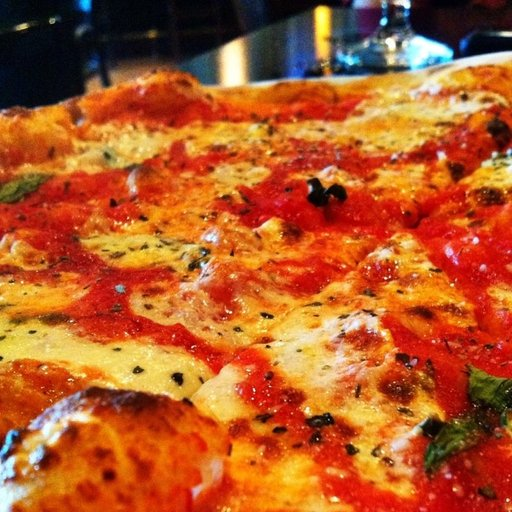

In [68]:
img = Image.open(random_image_path)
print(f"Image path: {random_image_path}")
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
print(f"Image format: {img.format}")
img 

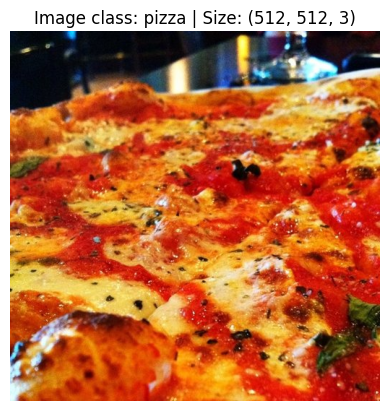

In [69]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.array(img)

plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Size: {img_as_array.shape}")
plt.axis(False);


## Transforming Data

In [70]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [71]:
data_transform(img) 

tensor([[[0.0157, 0.0157, 0.0118,  ..., 0.2314, 0.1922, 0.1020],
         [0.0157, 0.0157, 0.0157,  ..., 0.1137, 0.1059, 0.1216],
         [0.0157, 0.0235, 0.0941,  ..., 0.1098, 0.1255, 0.1569],
         ...,
         [0.8549, 0.8275, 0.8039,  ..., 0.4353, 0.6353, 0.6902],
         [0.8667, 0.8392, 0.7922,  ..., 0.4824, 0.6235, 0.7412],
         [0.8627, 0.7333, 0.7255,  ..., 0.6627, 0.6549, 0.8000]],

        [[0.0588, 0.0510, 0.0392,  ..., 0.0510, 0.0471, 0.0392],
         [0.0549, 0.0471, 0.0431,  ..., 0.0431, 0.0431, 0.0549],
         [0.0667, 0.0706, 0.1176,  ..., 0.0510, 0.0471, 0.0510],
         ...,
         [0.9529, 0.8824, 0.8118,  ..., 0.1098, 0.0627, 0.0627],
         [0.9804, 0.8510, 0.6353,  ..., 0.0667, 0.0824, 0.2353],
         [0.9412, 0.5451, 0.3176,  ..., 0.0745, 0.0980, 0.3098]],

        [[0.1176, 0.0745, 0.0667,  ..., 0.0588, 0.0510, 0.0392],
         [0.1137, 0.0863, 0.0784,  ..., 0.0431, 0.0392, 0.0510],
         [0.0941, 0.0941, 0.1216,  ..., 0.0588, 0.0510, 0.

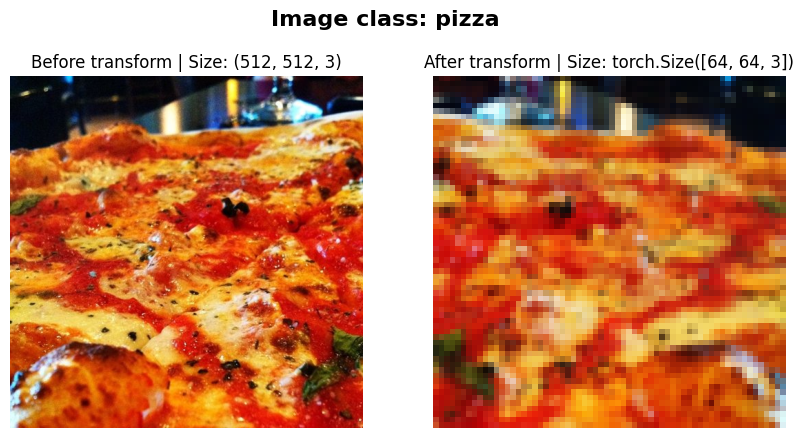

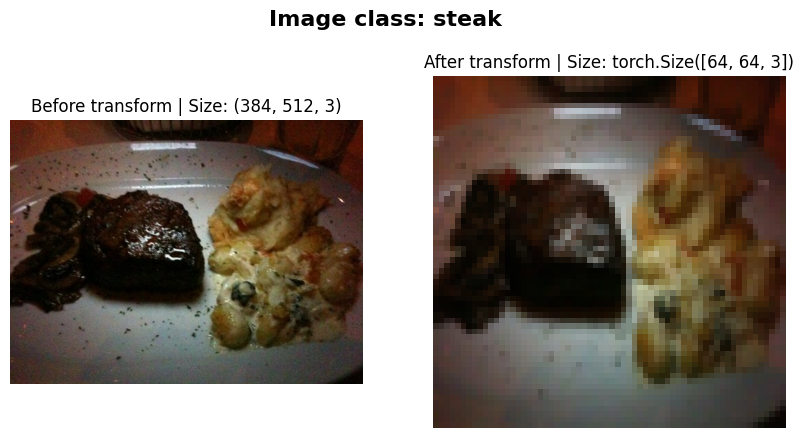

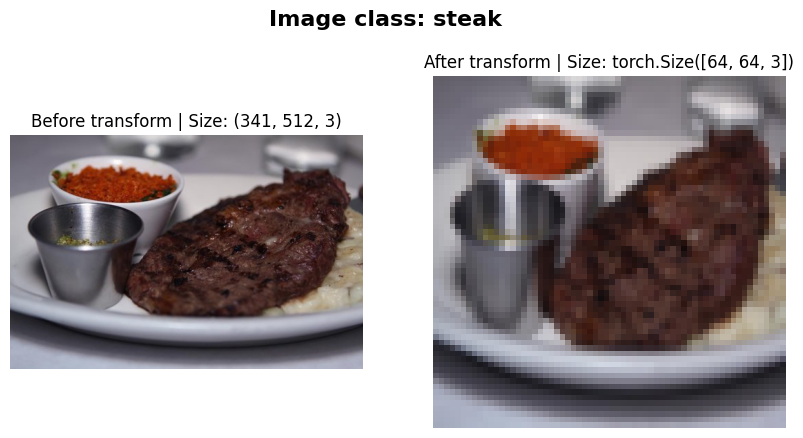

In [72]:
def plot_transformed_images(image_paths, transform, n = 3, seed = 42):
    
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
            ax[0].imshow(f)
            ax[0].set_title(f"Before transform | Size: {np.array(f).shape}")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1,2,0) # transform and change shape from (C, H, W) to (H, W, C), since matplotlib expects the last dimension to be the color channel
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"After transform | Size: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Image class: {image_path.parent.name}", fontsize=16, fontweight="bold")

plot_transformed_images(image_path_list, data_transform)

In [73]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/images/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/images/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [74]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [75]:
torch.manual_seed(42)

random_img_idx = random.sample(range(len(train_data)), k=1)[0]
random_img_idx

62

(-0.5, 63.5, 63.5, -0.5)

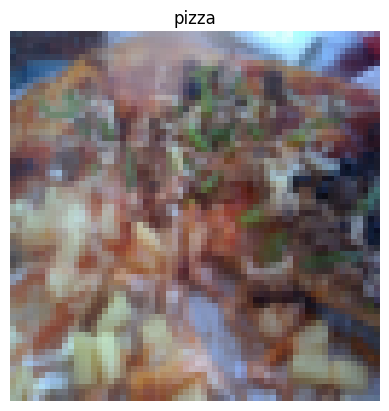

In [76]:

img, label = train_data[random_img_idx][0], train_data[random_img_idx][1]

img_permute = img.permute(1,2,0)

plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis(False)

## DataLoader

In [77]:
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

train_features, train_labels = next(iter(train_dataloader))
train_features.shape, train_labels.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [78]:
len(train_dataloader)

8

### Helper function to get class names

In [79]:
from typing import Tuple, List, Dict

target_directory = train_dir

class_names = sorted(os.listdir(target_directory))
class_names

['pizza', 'steak', 'sushi']

In [80]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(os.listdir(directory))
    if not classes:
        raise FileNotFoundError(f"Classes not found in {directory}.")
    classes_to_idx = {name: index for index, name in enumerate(classes)}
    return classes, classes_to_idx

find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Create Custom Dataset

In [81]:
from torch.utils.data import Dataset
import pathlib

class ImageFolderDataset(Dataset):
    def __init__(self, targ_dir: str, transform = None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.classes_to_idx = find_classes(targ_dir)

    def load_image(self, index: int) -> Image.Image:
        """Opens an image from a file path and returns it"""
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        """Returns the total number of images in the dataset"""
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """Returns one sample of data and it's label (X,, y)"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.classes_to_idx[class_name]

        # transoform the image if needed
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx


In [82]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_dataset_custom = ImageFolderDataset(targ_dir=train_dir, transform=train_transform)
test_dataset_custom = ImageFolderDataset(targ_dir=test_dir, transform=test_transform)

len(train_dataset_custom), len(test_dataset_custom)

(225, 75)

In [83]:
img, class_idx = train_dataset_custom[0]
img, class_idx

(tensor([[[0.1255, 0.1333, 0.1294,  ..., 0.9020, 0.8980, 0.8863],
          [0.2000, 0.2078, 0.2039,  ..., 0.9098, 0.9059, 0.8941],
          [0.2627, 0.2667, 0.2902,  ..., 0.9059, 0.9059, 0.8980],
          ...,
          [0.0510, 0.0549, 0.0824,  ..., 0.4353, 0.4431, 0.4471],
          [0.0431, 0.0353, 0.0431,  ..., 0.4314, 0.4275, 0.4314],
          [0.1529, 0.0784, 0.0431,  ..., 0.4196, 0.4196, 0.4314]],
 
         [[0.0824, 0.0902, 0.0863,  ..., 0.9176, 0.9137, 0.8980],
          [0.1216, 0.1294, 0.1294,  ..., 0.9255, 0.9176, 0.9059],
          [0.1725, 0.1765, 0.1922,  ..., 0.9216, 0.9176, 0.9098],
          ...,
          [0.0510, 0.0588, 0.0863,  ..., 0.3373, 0.3412, 0.3333],
          [0.0471, 0.0471, 0.0431,  ..., 0.3333, 0.3294, 0.3216],
          [0.1216, 0.0706, 0.0431,  ..., 0.3294, 0.3255, 0.3137]],
 
         [[0.0431, 0.0510, 0.0471,  ..., 0.8588, 0.8510, 0.8314],
          [0.0745, 0.0824, 0.0784,  ..., 0.8667, 0.8588, 0.8353],
          [0.1137, 0.1059, 0.1255,  ...,

### Function to display random number of images

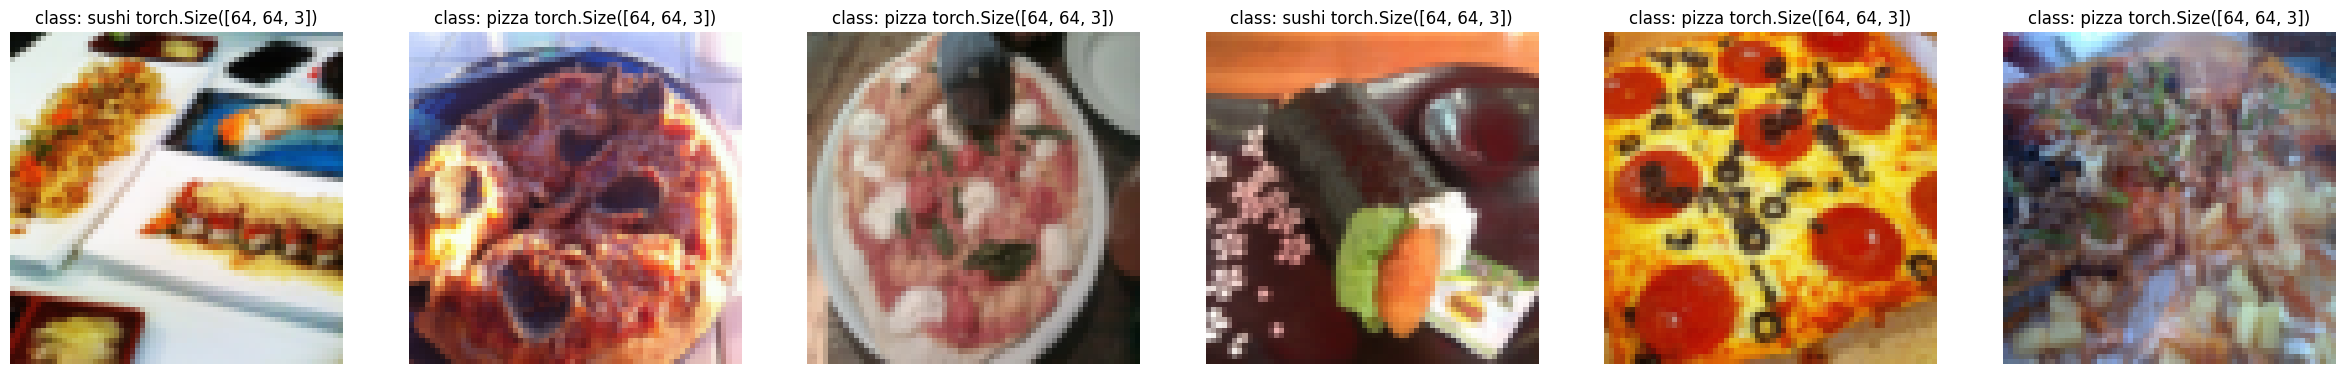

In [85]:
def display_random_image(dataset: torch.utils.data.dataset.Dataset, 
                         classes: List[str], 
                         n: int = 10) -> None:
    if n > 10:
        raise ValueError("Can't display more than 10 images.")
    
    random.seed(42)
    random_image_indices = random.sample(range(len(dataset)), k=n)

    fig, ax = plt.subplots(nrows=1, ncols=n, figsize=(30, 10))

    for i, idx in enumerate(random_image_indices):
        img, label = dataset[idx][0], dataset[idx][1]
        img_permute = img.permute(1,2,0)
        ax[i].imshow(img_permute)
        ax[i].set_title(f"class: {classes[label]} {img_permute.shape}")
        ax[i].axis(False)

display_random_image(train_data, class_names, n=6)


## Custom images to Dataloaders

In [87]:
train_dataloader = DataLoader(dataset=train_dataset_custom, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset_custom, batch_size=32, shuffle=False)

train_features, train_labels = next(iter(train_dataloader))
train_features.shape, train_labels.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Data Augmentation

In [88]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])



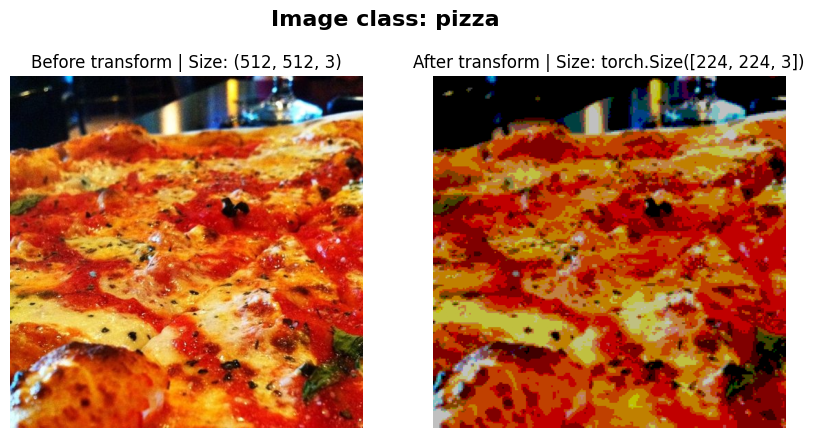

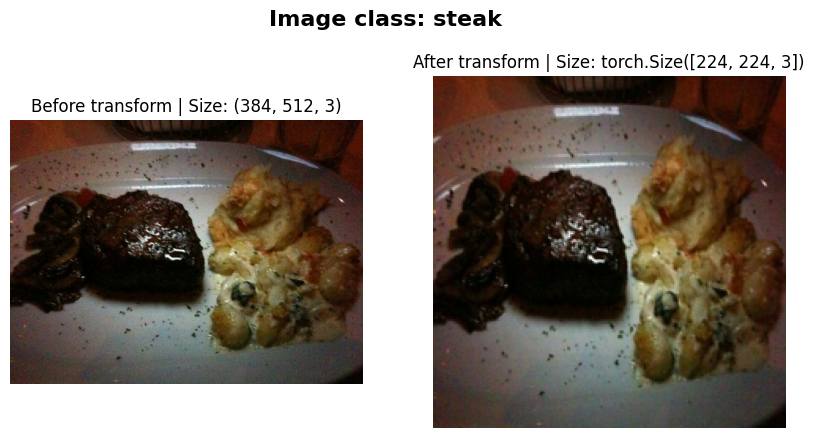

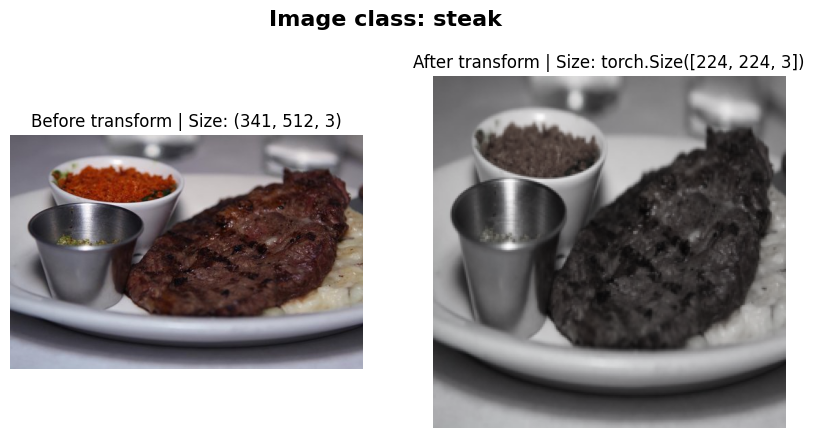

In [89]:
images_path_list = list(image_path.glob("*/*/*.jpg"))

plot_transformed_images(images_path_list, train_transform)
